In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import pearsonr

In [2]:
df_full = pd.read_csv("./20240229_2308.csv", header=None)

# The maximum length of the dataset is the number of rows
max_length = df_full.shape[0]

# Print the maximum length
print(f"The maximum length of the dataset is: {max_length}")

# Now, you can use this information to set length_read appropriately
length_read = min(12546000, max_length)  # for example, to limit it to 100000 or the maximum length available

df_reduced = df_full.iloc[::10000, :]
# Proceed with loading the desired portion of the dataset
df = pd.read_csv("./20240229_2308.csv", header=None).iloc[1:length_read:10000, :6]
df.columns = ["l1","l2","l3","r1","r2","r3"]
df.head()

C:\Users\yueze\AppData\Local\Temp\ipykernel_15064\4179976147.py:1: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_full = pd.read_csv("./20240229_2308.csv", header=None)


The maximum length of the dataset is: 12546118


C:\Users\yueze\AppData\Local\Temp\ipykernel_15064\4179976147.py:14: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./20240229_2308.csv", header=None).iloc[1:length_read:10000, :6]


,l1,l2,l3,r1,r2,r3
1,-2.390720118768513,-0.5347981965169311,-0.16361381206661463,0.9987793918699026,-0.13430978171527386,-2.253967977128923
10001,-2.3809521086513996,-0.5934062572196126,-0.13430978171527386,1.0573874525725842,-0.11477376148104668,-2.224663946777582
20001,-2.371184098534286,-0.6422463078051805,-0.14407779183238745,1.0769234728068113,-0.07570172101259232,-2.224663946777582
30001,-2.371184098534286,-0.6129422774538398,-0.21245386265218258,1.0085474019870162,-0.036629680544137955,-2.2344319568946958
40001,-2.3809521086513996,-0.6031742673367262,-0.11477376148104668,1.0769234728068113,-0.15384580194950104,-2.224663946777582


In [3]:
targets = ["r1", "r2", "r3"]

In [4]:
max_length = df.shape[0]

# Print the maximum length
print(f"The maximum length of the dataset is: {max_length}")


The maximum length of the dataset is: 1255


In [5]:
x = df.drop(columns=targets)
y = df[targets]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


In [8]:
print (y_pred.dtype) 
print (y_test.astype(np.float64).values.dtype)


float64
float64


In [9]:
correlation_coef, _ = pearsonr(y_pred.flatten(), y_test.astype(np.float64).values.flatten())


print(f"Correlation coefficient: {correlation_coef}")

Correlation coefficient: 0.9997941846359597


In [10]:
df = pd.read_csv("./20240229_2308.csv", header=None).iloc[1:length_read:1000, :6]
df.columns = ["l1","l2","l3","r1","r2","r3"]
df.head()
targets = ["r1", "r2", "r3"]
max_length = df.shape[0]

# Print the maximum length
print(f"The maximum length of the dataset is: {max_length}")
x = df.drop(columns=targets)
y = df[targets]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
correlation_coef, _ = pearsonr(y_pred.flatten(), y_test.astype(np.float64).values.flatten())


print(f"Correlation coefficient: {correlation_coef}")

C:\Users\yueze\AppData\Local\Temp\ipykernel_15064\1013062250.py:1: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./20240229_2308.csv", header=None).iloc[1:length_read:1000, :6]


The maximum length of the dataset is: 12546
Correlation coefficient: 0.9998373933052254


In [11]:
df = pd.read_csv("./20240229_2308.csv", header=None).iloc[1:length_read:1000, :6]
df.columns = ["l1","l2","l3","r1","r2","r3"]
df.head()
targets = ["r1", "r2", "r3"]
max_length = df.shape[0]

# Print the maximum length
print(f"The maximum length of the dataset is: {max_length}")
x = df.drop(columns=targets)
y = df[targets]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
correlation_coef, _ = pearsonr(y_pred.flatten(), y_test.astype(np.float64).values.flatten())


print(f"Correlation coefficient: {correlation_coef}")

C:\Users\yueze\AppData\Local\Temp\ipykernel_15064\1013062250.py:1: DtypeWarning: Columns (0,1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./20240229_2308.csv", header=None).iloc[1:length_read:1000, :6]


The maximum length of the dataset is: 12546
Correlation coefficient: 0.9998401974199176


In [12]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)

# Check if y_pred and y_test have the same shape
if y_pred.shape != y_test.shape:
    print("y_pred and y_test must have the same shape!")
else:
    # Iterate through each dimension (column) to compute correlation coefficient
    for i in range(y_pred.shape[1]):
        corr_coef, _ = pearsonr(y_pred[:, i], y_test[:, i].astype(np.float64))
        print (y_pred[:, i])
        print(f"Correlation coefficient for dimension {i}: {corr_coef}")

[0.1750431  0.47726533 0.55054169 ... 1.82974401 1.86128329 1.2960004 ]
Correlation coefficient for dimension 0: 0.9987981332729454
[1.39838869 1.77507246 0.35842121 ... 1.35941433 1.30348921 0.16610537]
Correlation coefficient for dimension 1: 0.9987943793050271
[-1.99560411 -1.63018936 -2.37494478 ... -0.89807049 -0.90200212
 -2.08451254]
Correlation coefficient for dimension 2: 0.9989420049171962


In [13]:
print (y_pred[-1], y_test[-1])

[ 1.2960004   0.16610537 -2.08451254] [1.3113557156175375 0.178266542032361 -2.0781437950208783]


ValueError: x and y must have same first dimension, but have shapes (12546,) and (2510,)

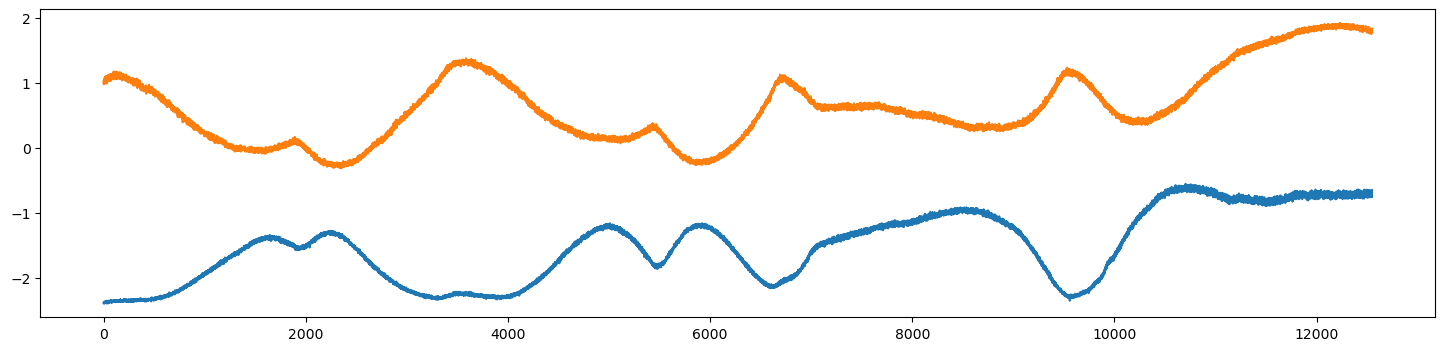

In [14]:
index_sequence = range(1, len(df) + 1)

plt.figure(figsize=(18, 4))
plt.plot(index_sequence, df["l1"].astype(np.float64).values, label="l1")
plt.plot(index_sequence, df["r1"].astype(np.float64).values, label="r1")
plt.plot(index_sequence, y_pred[:, i], label="r1")
plt.legend(loc="upper left")
plt.xlabel("Index")
plt.show()